In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("faizanyousafonly/bank-churn-pre-processed-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\faizanyousafonly\bank-churn-pre-processed-dataset\versions\1


In [5]:
import os

folder_path = r'C:\Users\Hp\.cache\kagglehub\datasets\faizanyousafonly\bank-churn-pre-processed-dataset\versions\1'
print("Files in dataset folder:")
print(os.listdir(folder_path))


Files in dataset folder:
['sample_submission.csv', 'test_preprocessed.csv', 'train_preprocessed.csv']


In [6]:
import pandas as pd
import os

folder_path = r'C:\Users\Hp\.cache\kagglehub\datasets\faizanyousafonly\bank-churn-pre-processed-dataset\versions\1'
file_path = os.path.join(folder_path, 'train_preprocessed.csv')

data = pd.read_csv(file_path)
print("Data Shape:", data.shape)
print(data.head())
print("Columns:", data.columns)


Data Shape: (165034, 19)
   id  CustomerId         Surname  CreditScore   Age  Tenure    Balance  \
0   0    15674932  Okwudilichukwu          668  33.0       3       0.00   
1   1    15749177   Okwudiliolisa          627  33.0       1       0.00   
2   2    15694510           Hsueh          678  40.0      10       0.00   
3   3    15741417             Kao          581  34.0       2  148882.54   
4   4    15766172       Chiemenam          716  33.0       5       0.00   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              2        1.0             0.0        181449.97       0   
1              2        1.0             1.0         49503.50       0   
2              2        1.0             0.0        184866.69       0   
3              1        1.0             1.0         84560.88       0   
4              2        1.0             1.0         15068.83       0   

   AgeCategory  CreditScoreCategory  BalanceCategory  SalaryCategory  \
0            2     

In [8]:
print(data.columns)


Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'AgeCategory', 'CreditScoreCategory',
       'BalanceCategory', 'SalaryCategory', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


Data Shape: (165034, 19)
   id  CustomerId         Surname  CreditScore   Age  Tenure    Balance  \
0   0    15674932  Okwudilichukwu          668  33.0       3       0.00   
1   1    15749177   Okwudiliolisa          627  33.0       1       0.00   
2   2    15694510           Hsueh          678  40.0      10       0.00   
3   3    15741417             Kao          581  34.0       2  148882.54   
4   4    15766172       Chiemenam          716  33.0       5       0.00   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              2        1.0             0.0        181449.97       0   
1              2        1.0             1.0         49503.50       0   
2              2        1.0             0.0        184866.69       0   
3              1        1.0             1.0         84560.88       0   
4              2        1.0             1.0         15068.83       0   

   AgeCategory  CreditScoreCategory  BalanceCategory  SalaryCategory  \
0            2     

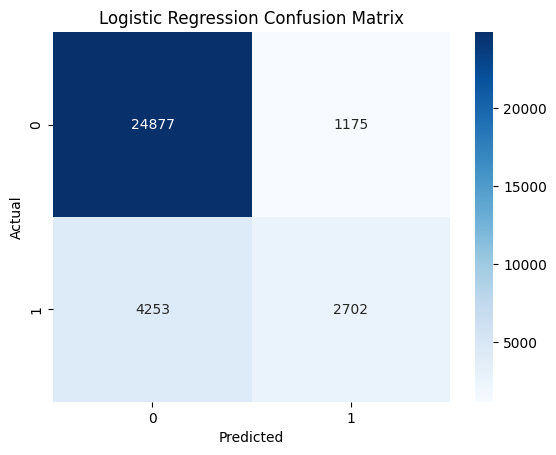


--- Random Forest ---
Accuracy: 0.8581815978428818
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     26052
           1       0.72      0.54      0.62      6955

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007



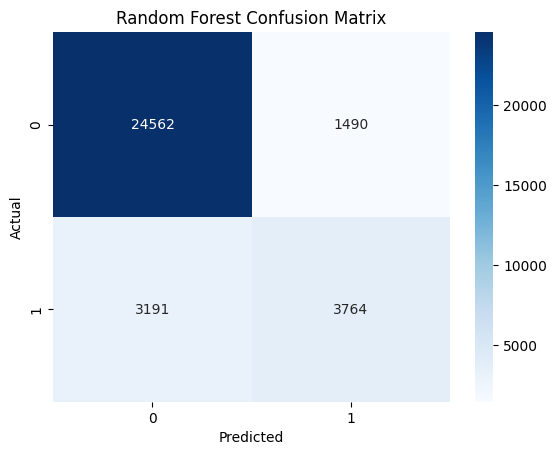


Best parameters from GridSearchCV: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Accuracy: 0.8636263794526878

--- Tuned Random Forest ---
Accuracy: 0.8652104099130488
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     26052
           1       0.76      0.52      0.62      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.74      0.77     33007
weighted avg       0.86      0.87      0.86     33007



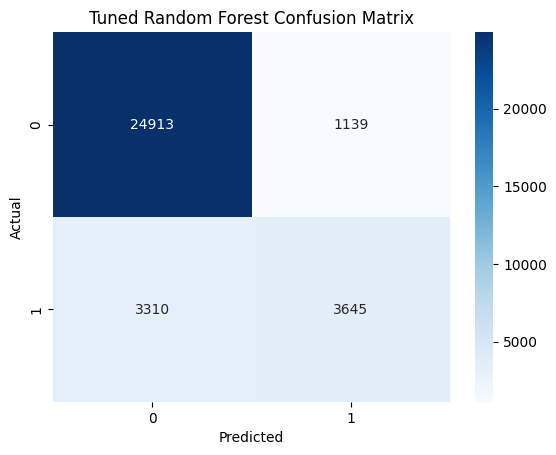

In [13]:


# Step 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import os

# Step 1: Load Data
folder_path = r'C:\Users\Hp\.cache\kagglehub\datasets\faizanyousafonly\bank-churn-pre-processed-dataset\versions\1'
file_path = os.path.join(folder_path, 'train_preprocessed.csv')
data = pd.read_csv(file_path)

print("Data Shape:", data.shape)
print(data.head())
print("Columns:", data.columns)

# Step 2: Drop Irrelevant Columns
drop_cols = ['id', 'CustomerId', 'Surname', 
             'AgeCategory', 'CreditScoreCategory', 
             'BalanceCategory', 'SalaryCategory', 'Exited']
X = data.drop(columns=drop_cols)
y = data['Exited']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Model Training

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 6: Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Step 7: Evaluate Models
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Step 8: Hyperparameter Tuning (Optional)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest parameters from GridSearchCV:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Step 9: Evaluate Tuned Model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")
